In [1]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Input,AveragePooling2D,Reshape,Activation
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [13]:
NIN = Sequential()
NIN.add(Conv2D(input_shape=(28,28,1), filters= 8, kernel_size = (1,1),padding = 'same'))
NIN.add(Flatten())
NIN.add(Dense(196,activation = 'relu'))
NIN.add(Reshape((14,14,1),input_shape = (196,1)))
NIN.add(Conv2D(16,(1,1),padding = 'same'))
NIN.add(Flatten())
NIN.add(Dense(49,activation = 'relu'))
NIN.add(Reshape((7,7,1),input_shape = (49,1)))
NIN.add(Flatten())
NIN.add(Dense(120,activation = 'relu'))
NIN.add(Dense(84,activation = 'relu'))
NIN.add(Dense(10))
NIN.add(Activation('softmax'))
NIN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 8)         16        
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 196)               1229508   
_________________________________________________________________
reshape_7 (Reshape)          (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 16)        32        
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 49)                153713    
__________

In [14]:
NIN.compile(optimizer=SGD(lr=0.01),loss = 'categorical_crossentropy', metrics=['accuracy'])
# x_train,y_train,x_test,y_test = preprocess()
history3 = NIN.fit(x_train,y_train,epochs=10,batch_size=128,shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 1.9961 - acc: 0.7592
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1604 - acc: 0.9519
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1093 - acc: 0.9665
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0863 - acc: 0.9735
Epoch 5/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0674 - acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0577 - acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0471 - acc: 0.9850
Epoch 8/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0393 - acc: 0.9874
Epoch 9/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0338 - acc: 0.9890
Epoch 10/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0286 - a

In [9]:
# 构建LeNet-5网络
lenet = Sequential()
lenet.add(Conv2D(input_shape = (28,28,1), filters=8, kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(MaxPool2D(pool_size=(2,2), strides=2))
lenet.add(Conv2D(input_shape=(16,16,8), filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(MaxPool2D(pool_size=(2,2), strides=2))
lenet.add(Flatten())
lenet.add(Dense(120, activation='relu'))
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(10, activation='softmax'))
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_15 (Dense)             (None, 84)                10164     
__________

In [10]:
lenet.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
lenet_history = lenet.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.4354 - acc: 0.8739
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1316 - acc: 0.9594
Epoch 3/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0968 - acc: 0.9703
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0791 - acc: 0.9758
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0669 - acc: 0.9795
Epoch 6/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0591 - acc: 0.9813
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0514 - acc: 0.9840
Epoch 8/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0452 - acc: 0.9858
Epoch 9/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0408 - acc: 0.9869
Epoch 10/10
60000/60000 [==============================] - 10s 172us/step - loss: 

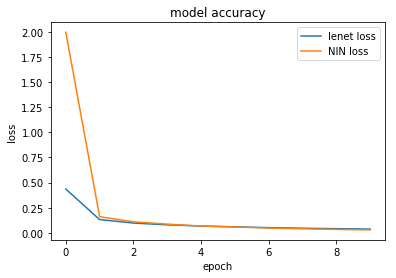

In [15]:
# summarize history for accuracy
plt.plot(lenet_history.history['loss'])
plt.plot(history3.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['lenet loss','NIN loss'], loc='upper right')
plt.show()